# Preparando espécie American Toad

## Limpando dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import math
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
import scipy.stats as st
from scipy.stats import ranksums

%matplotlib inline

In [2]:
base = pd.read_csv("americanToadCorre.csv")

In [3]:
base.drop('id',axis=1,inplace=True)
base

,date,lat,lng,tornado,monthtodatesnowfalli,thunder,meantempi,snow,meanvism,meanwdire,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,NaN,0.0,62.0,0.0,NaN,Variable,...,-1.0,48.0,NaN,75.0,NaN,12.0,NaN,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,NaN,0.0,52.0,0.0,27.6,NE,...,38.0,50.0,17.2,98.0,NaN,6.0,NaN,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,NaN,0.0,44.0,0.0,NaN,ENE,...,59.0,36.0,NaN,100.0,NaN,-2.0,NaN,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,NaN,0.0,46.0,0.0,NaN,NW,...,320.0,38.0,NaN,95.0,NaN,5.0,NaN,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,NaN,0.0,40.0,0.0,NaN,South,...,191.0,30.0,NaN,83.0,NaN,0.0,NaN,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,NaN,0.0,73.0,0.0,NaN,SW,...,218.0,66.0,NaN,92.0,NaN,19.0,NaN,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,NaN,0.0,42.0,0.0,NaN,NE,...,39.0,38.0,NaN,95.0,NaN,4.0,NaN,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,SSE,...,162.0,69.0,NaN,100.0,NaN,20.0,NaN,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,NaN,0.0,54.0,0.0,NaN,WNW,...,297.0,43.0,NaN,96.0,NaN,7.0,NaN,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,South,...,174.0,59.0,NaN,88.0,NaN,17.0,NaN,81.0,63.0,55.0


In [4]:
#Eliminando pontos coordenados errados
base.drop(3430,inplace=True)
base.drop(3434,inplace=True)
base.drop(3446,inplace=True)
base.drop(3454,inplace=True)
base.drop(3489,inplace=True)
base.drop(3533,inplace=True)
base.drop(3420,inplace=True)

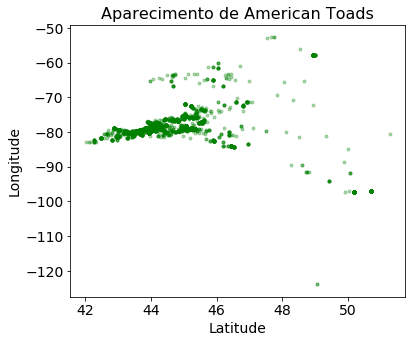

In [5]:
plt.figure(figsize=(6,5))
plt.rc('font',size=14)
plt.rc('axes',titlesize=16)
plt.scatter(base["lat"], base["lng"],marker=".",alpha='0.3',color="green")
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.title("Aparecimento de American Toads")
plt.show()

In [6]:
base.shape

(3675, 72)

In [7]:
#Base original
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 72 columns):
date                                  3675 non-null int64
lat                                   3675 non-null float64
lng                                   3675 non-null float64
tornado                               3561 non-null float64
monthtodatesnowfalli                  24 non-null object
thunder                               3561 non-null float64
meantempi                             3502 non-null float64
snow                                  3561 non-null float64
meanvism                              1691 non-null float64
meanwdire                             3430 non-null object
minhumidity                           3484 non-null float64
maxvism                               1691 non-null float64
since1jancoolingdegreedays            39 non-null float64
coolingdegreedays                     3502 non-null float64
maxdewptm                             3484 non-null float64
m

In [8]:
#Descrição da base original
base.describe()

,date,lat,lng,tornado,thunder,meantempi,snow,meanvism,minhumidity,maxvism,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.0,3561.000000,3502.000000,3561.000000,1691.000000,3484.000000,1691.000000,...,3561.000000,3484.000000,1691.00000,3484.000000,24.0,3503.000000,24.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.0,0.046616,58.595945,0.005336,17.144648,43.931688,20.598108,...,138.276889,48.096728,10.66984,89.204937,0.0,8.805881,36.750000,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.0,0.210845,9.752716,0.072860,5.771699,18.516513,4.592061,...,116.293902,11.177302,3.59805,11.459220,0.0,5.713660,29.078679,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.0,0.000000,-11.000000,0.000000,1.600000,4.000000,3.000000,...,-1.000000,-17.000000,1.00000,24.000000,0.0,-33.000000,0.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.0,0.000000,52.000000,0.000000,13.650000,30.000000,16.000000,...,-1.000000,40.000000,8.50000,84.000000,0.0,5.000000,0.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.0,0.000000,59.000000,0.000000,16.000000,42.500000,24.100000,...,146.000000,49.000000,10.00000,93.000000,0.0,9.000000,58.800000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.0,0.000000,66.000000,0.000000,23.400000,56.000000,24.100000,...,234.000000,56.000000,14.60000,99.000000,0.0,13.000000,58.800000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,0.0,1.000000,85.000000,1.000000,29.200000,100.000000,32.200000,...,360.000000,77.000000,18.10000,100.000000,0.0,25.000000,58.800000,130.000000,88.000000,75.000000


In [9]:
# Elimina as features com poucos valores ou as que são preenchidas com 0
def limpa_ruins(data):
    zeros = []
    poucos = []
    for c in data.columns:
        if (data[c].dtype != 'object' and data[c].mean() == 0):
            data.drop(c,axis=1,inplace=True)
            zeros.append(c)
        elif (data[c].count() < 1700):
            poucos.append(c)
            data.drop(c,axis=1,inplace=True)
    return zeros, poucos

In [10]:
z,p = limpa_ruins(base)

In [11]:
# Zeradas
z

['tornado', 'snowdepthm', 'snowdepthi']

In [12]:
# Poucos dados (menos de 50%)
p

['monthtodatesnowfalli',
 'meanvism',
 'maxvism',
 'since1jancoolingdegreedays',
 'monthtodatecoolingdegreedays',
 'since1sepheatingdegreedays',
 'since1julsnowfallm',
 'monthtodatesnowfallm',
 'since1sepcoolingdegreedaysnormal',
 'monthtodateheatingdegreedaysnormal',
 'snowfallm',
 'since1julheatingdegreedays',
 'coolingdegreedaysnormal',
 'minvisi',
 'since1sepheatingdegreedaysnormal',
 'since1julheatingdegreedaysnormal',
 'snowfalli',
 'monthtodateheatingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'since1sepcoolingdegreedays',
 'minvism',
 'maxvisi',
 'heatingdegreedaysnormal',
 'since1jancoolingdegreedaysnormal',
 'meanvisi',
 'since1julsnowfalli']

## Convertendo Objects a Int

In [13]:
def trata_objects(data):
    objects = []
    for c in data.columns:
        if (data[c].dtype == 'object'):
            objects.append(c)
    data['precipm'].replace({'T': 10},inplace=True)
    data['precipm'] = data['precipm'].astype("float")
    # Consideradas pouco importantes
    data.drop('precipsource', axis=1,inplace=True)
    data.drop('meanwdire',axis=1,inplace=True)
    objects
#Precipi será eliminada posteriormente, então não será tratada

In [14]:
trata_objects(base)

In [15]:
set(base['precipm'])

{0.0,
 nan,
 0.2,
 0.3,
 0.4,
 1.5,
 1.52,
 2.0,
 2.8,
 3.0,
 4.0,
 5.0,
 nan,
 1.0,
 6.0,
 7.0,
 8.0,
 9.0,
 9.4,
 10.0,
 11.0,
 12.0,
 13.0,
 13.72,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 nan,
 nan,
 28.0,
 29.0,
 66.1,
 nan,
 32.0,
 nan,
 nan,
 35.0,
 39.0,
 39.88,
 47.0,
 51.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 8.64,
 nan,
 nan,
 nan,
 0.1,
 0.51,
 0.6,
 0.76,
 1.78,
 1.8,
 4.06,
 4.1,
 4.83,
 5.8,
 7.4,
 9.2,
 12.19,
 12.7,
 nan,
 0.8,
 2.5,
 8.6,
 11.4,
 15.5,
 15.8,
 20.0,
 23.0,
 24.38,
 24.6,
 37.1,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 25.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.27,
 13.46,
 37.0,
 nan,
 nan,
 0.5,
 1.02,
 2.29,
 6.1,
 10.67,
 nan,
 nan,
 nan,
 20.1,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.7,
 1.3,
 2.03,
 2.3,
 3.6,
 5.33,
 nan,
 7.62,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

## Limpando features duplicadas com medidas diferentes

In [16]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 41 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
meantempi            3502 non-null float64
snow                 3561 non-null float64
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3561 non-null object
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null float64
gdegreedays          3502 non-null float64
mindewptm            3484 non-null f

In [17]:
# Serão eliminadas as features com '*' na célula anterior por ter outra que a represente em ua medida mais comum
def elimina_medida_dif(data):
    # Features relacionadas a graus
    data.drop('meantempi',axis=1,inplace=True)
    data.drop('mintempi',axis=1,inplace=True)
    data.drop('meandewpti',axis=1,inplace=True)
    data.drop('maxtempi',axis=1,inplace=True)
    data.drop('maxdewpti',axis=1,inplace=True)
    data.drop('mindewpti',axis=1,inplace=True)
    # Outras features
    data.drop('precipi',axis=1,inplace=True)
    data.drop('meanwindspdi',axis=1,inplace=True)
    data.drop('maxwspdi',axis=1,inplace=True)
    data.drop('meanpressurei',axis=1,inplace=True)
    data.drop('minwspdi',axis=1,inplace=True)
    data.drop('maxpressurei',axis=1,inplace=True)
    data.drop('minpressurei',axis=1,inplace=True)

In [18]:
elimina_medida_dif(base)

In [19]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 28 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
snow                 3561 non-null float64
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
rain                 3561 non-null float64
minwspdm             3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
gdegreedays          3502 non-null float64
mindewptm            3484 non-null float64
minpressurem         3327 non-null float64
maxtempm             3503 non-null float64
meanwindspdm         3397 non-null float64
maxpressurem         3327 non-null float64
hail                 3561 non-null 

## Convertendo Lontitude e Latitude de graus para Rad

In [20]:
def converte_rad(data):
    data['lat'] = data['lat']*np.pi/180
    data['lng'] = data['lng']*np.pi/180

In [21]:
converte_rad(base)

In [22]:
base.head(10)

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,20150603,0.855986,-2.162174,0.0,0.0,50.0,0.0,10.0,4.0,1016.50,...,1.0,1017.0,0.0,9.0,2.0,0.0,16.0,-1.0,75.0,12.0
1,20150603,0.855986,-2.162174,0.0,0.0,46.0,0.0,12.0,12.0,1018.62,...,5.0,1024.0,0.0,10.0,15.0,0.0,12.0,38.0,98.0,6.0
2,20080504,0.810612,-1.106800,0.0,0.0,36.0,0.0,6.0,21.0,1020.73,...,5.0,1023.0,0.0,2.0,15.0,0.2,7.0,59.0,100.0,-2.0
3,20111026,0.807068,-1.109066,0.0,0.0,51.0,0.0,7.0,20.0,1000.00,...,22.0,1002.0,0.0,3.0,37.0,2.0,7.0,320.0,95.0,5.0
4,20170501,0.809122,-1.102953,0.0,0.0,32.0,0.0,4.0,24.0,1022.96,...,10.0,1025.0,0.0,-1.0,17.0,4.0,4.0,191.0,83.0,0.0
5,20100709,0.810502,-1.119235,0.0,0.0,52.0,8.0,21.0,0.0,1014.27,...,24.0,1016.0,0.0,19.0,37.0,0.0,22.0,218.0,92.0,19.0
6,20110512,0.808688,-1.111839,0.0,0.0,77.0,0.0,4.0,23.0,1019.33,...,31.0,1021.0,0.0,3.0,43.0,0.0,5.0,39.0,95.0,4.0
7,20020830,0.884983,-1.694755,0.0,0.0,79.0,6.0,22.0,0.0,NaN,...,16.0,NaN,0.0,20.0,30.0,0.0,22.0,162.0,100.0,20.0
8,20020914,0.884983,-1.694755,0.0,0.0,38.0,0.0,8.0,10.0,NaN,...,15.0,NaN,0.0,6.0,26.0,0.0,12.0,297.0,96.0,7.0
9,20020917,0.884983,-1.694755,0.0,0.0,41.0,7.0,17.0,0.0,NaN,...,23.0,NaN,0.0,15.0,35.0,0.0,22.0,174.0,88.0,17.0


## Preenchimento de NaN

In [23]:
len(base.columns)

28

In [24]:
co = base.columns
co = co.delete(0)
co = co.delete(0)
co = co.delete(0)
# Features que serão preenchidas
co

Index([u'thunder', u'snow', u'minhumidity', u'coolingdegreedays', u'maxdewptm',
       u'heatingdegreedays', u'meanpressurem', u'rain', u'minwspdm', u'fog',
       u'humidity', u'gdegreedays', u'mindewptm', u'minpressurem', u'maxtempm',
       u'meanwindspdm', u'maxpressurem', u'hail', u'meandewptm', u'maxwspdm',
       u'precipm', u'meantempm', u'meanwdird', u'maxhumidity', u'mintempm'],
      dtype='object')

In [25]:
size = len(base)
size

3675

In [26]:
t = base.copy()

In [27]:
# Retorna a média dos dados e o intervalo de confiança
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [28]:
# Escolhendo o melhor número de vizinhos para cada feature
# KNeighborsRegressor(n_neighbors=k) Instancia o modelo e diz o número de vizinhos (k)
# OBS.: evite número par para evitar empates e também números grandes para usar uma vizinhança mais próximas
# Avalia com base no intervalo de confiança
base = t.copy()
ks = {}
scores_ic = []
scores_mean = []
erros = []
comp = {}
for c in co:
    if (base[c].count() < size):
        x = base.dropna(subset=[c])
        print("Feature:",c)
        mini = {}
        s = []
        for k in range(1,30):
            cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
            kviz = KNeighborsRegressor(n_neighbors=k)
            scores = cross_val_score(kviz, x.loc[:,['date','lat','lng']],
                                     x[c], cv=cv, n_jobs=4, scoring = 'neg_mean_absolute_error')
            s.append([k,scores])
            m, h = confidence_interval(scores)
            mini[m] = k
            print('knn: ',k, "mean: {:.3f} (interval: {:.4f}".format(m,h))
            if(c=='rain'):
                scores_mean.append(m)
                scores_ic.append(h)
        comp[c] = s
        #Escolhe o k que maximiza a média do score negativado
        ks[c] = mini[np.max(mini.keys())]
        erros.append(np.max(mini.keys()))
        print("melhor k:",ks[c])

('Feature:', 'thunder')
('knn: ', 1, 'mean: -0.061 (interval: 0.0066')
('knn: ', 2, 'mean: -0.067 (interval: 0.0048')
('knn: ', 3, 'mean: -0.070 (interval: 0.0045')
('knn: ', 4, 'mean: -0.073 (interval: 0.0043')
('knn: ', 5, 'mean: -0.075 (interval: 0.0041')
('knn: ', 6, 'mean: -0.077 (interval: 0.0042')
('knn: ', 7, 'mean: -0.079 (interval: 0.0038')
('knn: ', 8, 'mean: -0.080 (interval: 0.0037')
('knn: ', 9, 'mean: -0.082 (interval: 0.0036')
('knn: ', 10, 'mean: -0.082 (interval: 0.0036')
('knn: ', 11, 'mean: -0.083 (interval: 0.0031')
('knn: ', 12, 'mean: -0.084 (interval: 0.0030')
('knn: ', 13, 'mean: -0.085 (interval: 0.0029')
('knn: ', 14, 'mean: -0.085 (interval: 0.0029')
('knn: ', 15, 'mean: -0.085 (interval: 0.0028')
('knn: ', 16, 'mean: -0.085 (interval: 0.0029')
('knn: ', 17, 'mean: -0.085 (interval: 0.0028')
('knn: ', 18, 'mean: -0.086 (interval: 0.0026')
('knn: ', 19, 'mean: -0.086 (interval: 0.0024')
('knn: ', 20, 'mean: -0.086 (interval: 0.0023')
('knn: ', 21, 'mean: -0.0

('knn: ', 22, 'mean: -4.689 (interval: 0.1490')
('knn: ', 23, 'mean: -4.729 (interval: 0.1484')
('knn: ', 24, 'mean: -4.762 (interval: 0.1437')
('knn: ', 25, 'mean: -4.798 (interval: 0.1388')
('knn: ', 26, 'mean: -4.835 (interval: 0.1365')
('knn: ', 27, 'mean: -4.866 (interval: 0.1359')
('knn: ', 28, 'mean: -4.898 (interval: 0.1407')
('knn: ', 29, 'mean: -4.925 (interval: 0.1421')
('melhor k:', 1)
('Feature:', 'meanpressurem')
('knn: ', 1, 'mean: -2.826 (interval: 0.1437')
('knn: ', 2, 'mean: -2.929 (interval: 0.1699')
('knn: ', 3, 'mean: -3.022 (interval: 0.1467')
('knn: ', 4, 'mean: -3.201 (interval: 0.1408')
('knn: ', 5, 'mean: -3.335 (interval: 0.1240')
('knn: ', 6, 'mean: -3.445 (interval: 0.1148')
('knn: ', 7, 'mean: -3.559 (interval: 0.1106')
('knn: ', 8, 'mean: -3.647 (interval: 0.0993')
('knn: ', 9, 'mean: -3.724 (interval: 0.0899')
('knn: ', 10, 'mean: -3.792 (interval: 0.0949')
('knn: ', 11, 'mean: -3.870 (interval: 0.1046')
('knn: ', 12, 'mean: -3.939 (interval: 0.1084')
('

('knn: ', 15, 'mean: -4.572 (interval: 0.0563')
('knn: ', 16, 'mean: -4.618 (interval: 0.0583')
('knn: ', 17, 'mean: -4.660 (interval: 0.0610')
('knn: ', 18, 'mean: -4.695 (interval: 0.0648')
('knn: ', 19, 'mean: -4.733 (interval: 0.0675')
('knn: ', 20, 'mean: -4.774 (interval: 0.0699')
('knn: ', 21, 'mean: -4.811 (interval: 0.0675')
('knn: ', 22, 'mean: -4.858 (interval: 0.0615')
('knn: ', 23, 'mean: -4.900 (interval: 0.0625')
('knn: ', 24, 'mean: -4.934 (interval: 0.0625')
('knn: ', 25, 'mean: -4.971 (interval: 0.0629')
('knn: ', 26, 'mean: -5.007 (interval: 0.0617')
('knn: ', 27, 'mean: -5.035 (interval: 0.0631')
('knn: ', 28, 'mean: -5.062 (interval: 0.0638')
('knn: ', 29, 'mean: -5.083 (interval: 0.0624')
('melhor k:', 1)
('Feature:', 'mindewptm')
('knn: ', 1, 'mean: -2.892 (interval: 0.0762')
('knn: ', 2, 'mean: -2.813 (interval: 0.0596')
('knn: ', 3, 'mean: -2.874 (interval: 0.0836')
('knn: ', 4, 'mean: -2.921 (interval: 0.0660')
('knn: ', 5, 'mean: -3.001 (interval: 0.0698')
('

('knn: ', 8, 'mean: -0.002 (interval: 0.0006')
('knn: ', 9, 'mean: -0.002 (interval: 0.0005')
('knn: ', 10, 'mean: -0.002 (interval: 0.0005')
('knn: ', 11, 'mean: -0.002 (interval: 0.0005')
('knn: ', 12, 'mean: -0.002 (interval: 0.0004')
('knn: ', 13, 'mean: -0.002 (interval: 0.0004')
('knn: ', 14, 'mean: -0.002 (interval: 0.0005')
('knn: ', 15, 'mean: -0.002 (interval: 0.0005')
('knn: ', 16, 'mean: -0.002 (interval: 0.0005')
('knn: ', 17, 'mean: -0.002 (interval: 0.0005')
('knn: ', 18, 'mean: -0.002 (interval: 0.0005')
('knn: ', 19, 'mean: -0.002 (interval: 0.0005')
('knn: ', 20, 'mean: -0.002 (interval: 0.0005')
('knn: ', 21, 'mean: -0.002 (interval: 0.0005')
('knn: ', 22, 'mean: -0.002 (interval: 0.0005')
('knn: ', 23, 'mean: -0.002 (interval: 0.0005')
('knn: ', 24, 'mean: -0.002 (interval: 0.0005')
('knn: ', 25, 'mean: -0.002 (interval: 0.0005')
('knn: ', 26, 'mean: -0.002 (interval: 0.0005')
('knn: ', 27, 'mean: -0.002 (interval: 0.0005')
('knn: ', 28, 'mean: -0.002 (interval: 0.0

('knn: ', 1, 'mean: -7.838 (interval: 0.2662')
('knn: ', 2, 'mean: -7.394 (interval: 0.2512')
('knn: ', 3, 'mean: -7.266 (interval: 0.2250')
('knn: ', 4, 'mean: -7.219 (interval: 0.2219')
('knn: ', 5, 'mean: -7.257 (interval: 0.1770')
('knn: ', 6, 'mean: -7.311 (interval: 0.1782')
('knn: ', 7, 'mean: -7.351 (interval: 0.1654')
('knn: ', 8, 'mean: -7.390 (interval: 0.1518')
('knn: ', 9, 'mean: -7.429 (interval: 0.1548')
('knn: ', 10, 'mean: -7.497 (interval: 0.1641')
('knn: ', 11, 'mean: -7.544 (interval: 0.1687')
('knn: ', 12, 'mean: -7.575 (interval: 0.1716')
('knn: ', 13, 'mean: -7.631 (interval: 0.1791')
('knn: ', 14, 'mean: -7.662 (interval: 0.1708')
('knn: ', 15, 'mean: -7.701 (interval: 0.1640')
('knn: ', 16, 'mean: -7.723 (interval: 0.1650')
('knn: ', 17, 'mean: -7.733 (interval: 0.1507')
('knn: ', 18, 'mean: -7.751 (interval: 0.1566')
('knn: ', 19, 'mean: -7.766 (interval: 0.1647')
('knn: ', 20, 'mean: -7.786 (interval: 0.1622')
('knn: ', 21, 'mean: -7.807 (interval: 0.1621')
(

In [29]:
comp

{'coolingdegreedays': [[1,
   array([-0.98573466, -1.0342368 , -1.11412268, -1.03851641, -1.08131241,
          -1.04992867, -0.94579173, -1.18259629, -1.12410842, -0.9828816 ])],
  [2, array([-0.94721826, -1.06776034, -1.15335235, -1.08273894, -1.10770328,
          -1.13338088, -1.03780314, -1.17617689, -1.12767475, -1.06918688])],
  [3, array([-0.95863053, -1.14360437, -1.24869234, -1.12410842, -1.1022349 ,
          -1.14788398, -1.1022349 , -1.23918212, -1.12553495, -1.11840228])],
  [4, array([-0.9989301 , -1.22574893, -1.25891583, -1.14907275, -1.15049929,
          -1.13801712, -1.14586305, -1.28780314, -1.16262482, -1.17189729])],
  [5, array([-1.05706134, -1.25563481, -1.25335235, -1.221398  , -1.19514979,
          -1.18373752, -1.20142653, -1.32296719, -1.23166904, -1.24536377])],
  [6, array([-1.08416548, -1.29196386, -1.28887304, -1.29196386, -1.2382311 ,
          -1.22491679, -1.26581075, -1.37161198, -1.25511175, -1.27009035])],
  [7, array([-1.11045445, -1.30670471, -

In [30]:
# Gera df com as médias de cada k
# As entre colchetes tiveram empate estatístico (p > 0.05)
# As que possuem um asterisco na frente representam o k escolhido e a média que ficou
equiv = {}
for c in co:
    equiv[c] = []
    for i in comp[c]:
        if (np.mean(comp[c][ks[c]-1][1]) != np.mean(i[1])):
            s,p = ranksums(comp[c][ks[c]-1][1], i[1])
            if (p > 0.05):
                equiv[c].append([round(np.mean(i[1]),4)])
            else:
                equiv[c].append(round(np.mean(i[1]),4))
        else:
            equiv[c].append(['*',round(np.mean(i[1]),4)])
equiv = pd.DataFrame(data=equiv,index=range(1,30))
equiv.to_csv("comparacao_estatistica.csv")
equiv

,coolingdegreedays,fog,gdegreedays,hail,heatingdegreedays,humidity,maxdewptm,maxhumidity,maxpressurem,maxtempm,...,meanwindspdm,mindewptm,minhumidity,minpressurem,mintempm,minwspdm,precipm,rain,snow,thunder
1,"[*, -1.0539]","[*, -0.0756]","[*, -3.5285]",[-0.0021],"[*, -3.5106]",[-9.0732],[-2.6067],-7.8377,"[*, -2.6122]",[-2.9817],...,-3.624,[-2.8918],[-11.7187],"[*, -3.1189]",[-3.0462],[-2.7724],"[*, -1.4261]","[*, -0.222]",[-0.0069],"[*, -0.0606]"
2,[-1.0903],[-0.0807],[-3.5588],[-0.0022],[-3.5113],"[*, -8.8001]","[*, -2.5981]",[-7.3941],[-2.7331],"[*, -2.9565]",...,[-3.4518],"[*, -2.8126]","[*, -11.5402]",[-3.2101],"[*, -2.9575]",[-2.705],[-1.4623],-0.2388,"[*, -0.0067]",[-0.0675]
3,-1.1311,-0.0829,[-3.608],[-0.0022],[-3.546],[-8.932],[-2.6604],[-7.266],-2.8366,[-3.0321],...,[-3.3913],[-2.8744],[-11.6519],-3.3088,[-3.0053],"[*, -2.6872]",[-1.4811],-0.247,[-0.0072],-0.07
4,-1.1689,-0.0855,-3.7331,[-0.0021],[-3.658],-9.0417,-2.7357,"[*, -7.2189]",-2.9998,-3.1189,...,[-3.3928],-2.9213,-11.8608,-3.4826,[-3.0535],[-2.7011],[-1.4864],-0.2549,[-0.0079],-0.0733
5,-1.2168,-0.0865,-3.8237,[-0.0021],-3.7469,-9.1595,-2.8219,[-7.2569],-3.108,-3.187,...,[-3.3775],-3.0015,-11.9646,-3.6119,[-3.1007],[-2.713],[-1.5238],-0.2611,[-0.008],-0.0748
6,-1.2583,-0.0873,-3.9313,[-0.0022],-3.8384,-9.2632,-2.8895,[-7.311],-3.2093,-3.2656,...,[-3.3704],-3.0737,-12.0659,-3.7141,-3.1553,[-2.7171],[-1.5405],-0.2673,[-0.0083],-0.0768
7,-1.2804,-0.0875,-4.0243,[-0.0023],-3.925,-9.4096,-2.9378,[-7.3512],-3.3174,-3.3305,...,[-3.3598],-3.1352,-12.2024,-3.8297,-3.1948,[-2.7216],[-1.5472],-0.271,[-0.0081],-0.0785
8,-1.3066,-0.0892,-4.1174,[-0.0024],-4.0086,-9.5001,-2.9824,[-7.3899],-3.3966,-3.39,...,[-3.3629],-3.1863,-12.2548,-3.9256,-3.248,[-2.7367],[-1.5383],-0.2735,[-0.0081],-0.0805
9,-1.3292,-0.0904,-4.1973,[-0.0024],-4.0735,-9.6275,-3.0214,[-7.4289],-3.4679,-3.4502,...,[-3.3531],-3.2255,-12.321,-4.0059,-3.2892,[-2.7472],[-1.5275],-0.2752,[-0.0078],-0.0816
10,-1.3561,-0.092,-4.2735,[-0.0024],-4.1413,-9.7641,-3.0645,-7.4968,-3.5318,-3.4994,...,[-3.3411],-3.2715,-12.4516,-4.0758,-3.3205,[-2.75],[-1.5281],-0.2766,[-0.0077],-0.0825


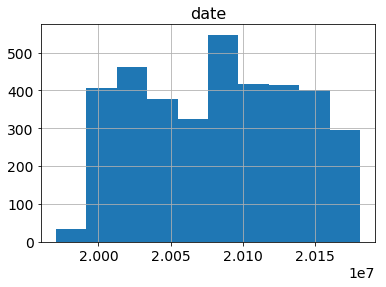

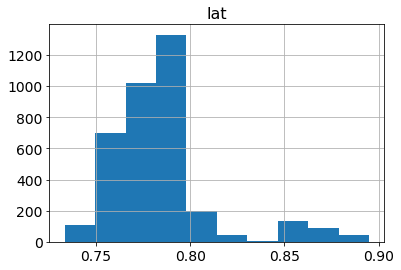

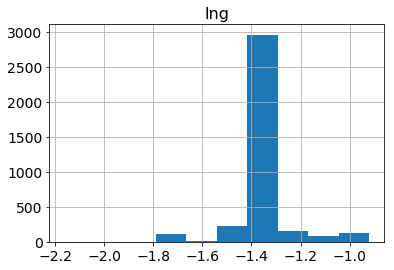

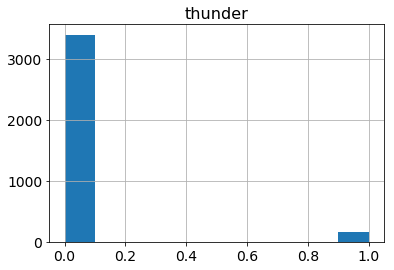

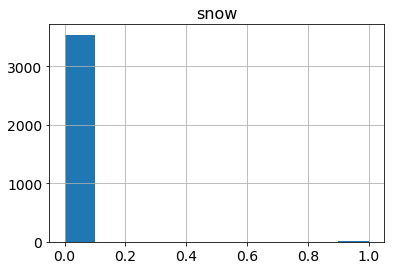

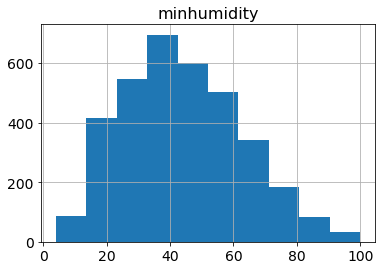

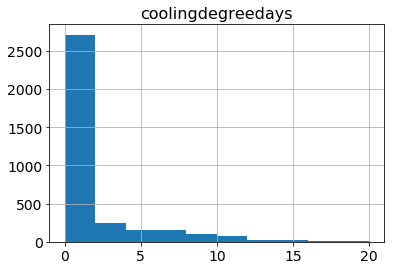

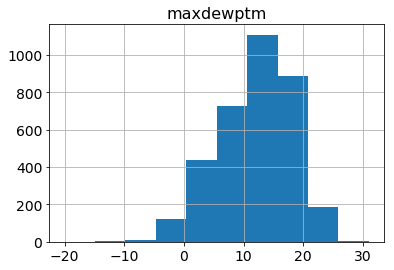

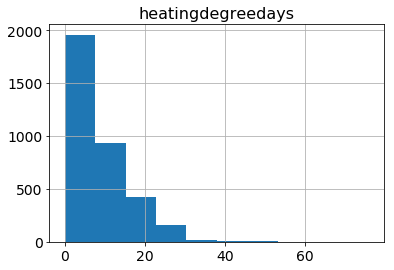

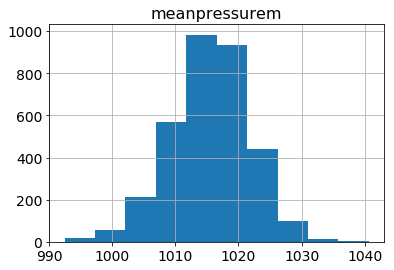

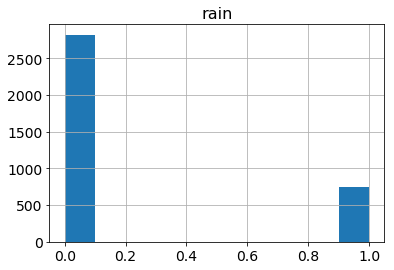

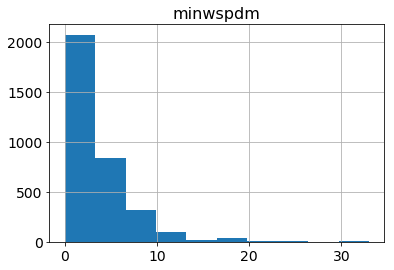

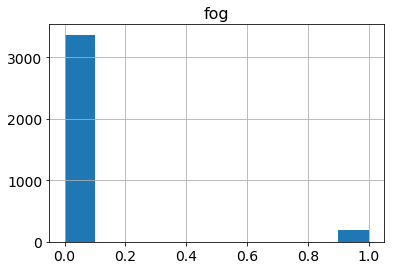

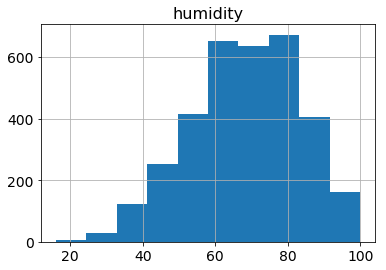

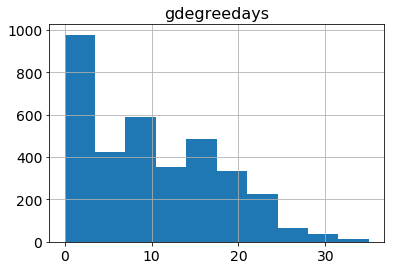

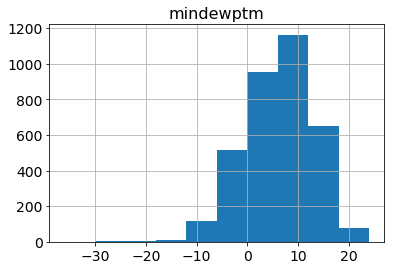

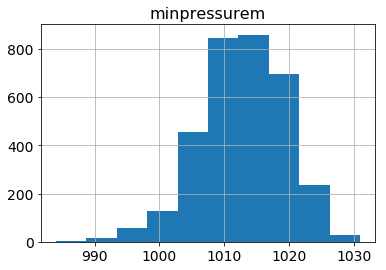

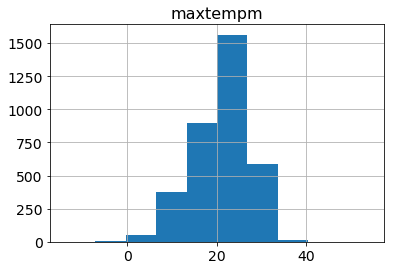

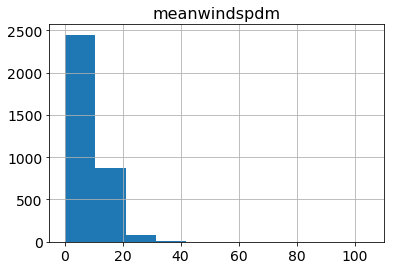

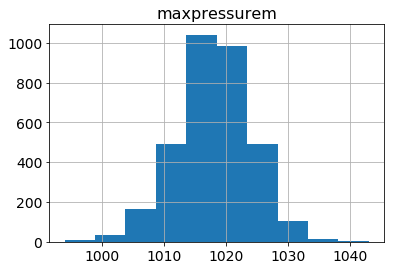

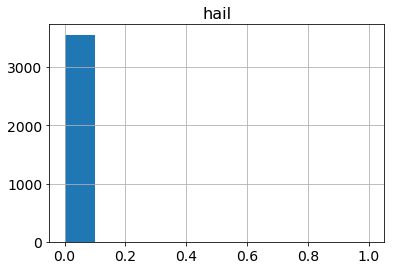

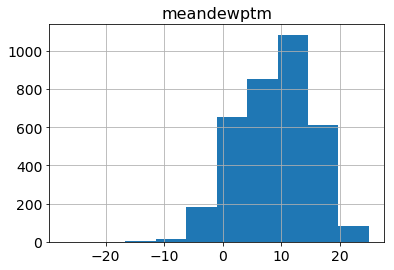

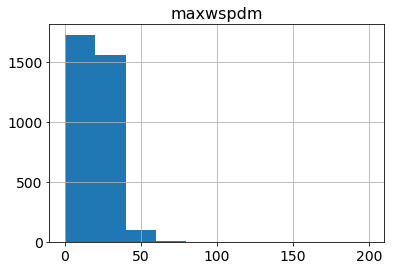

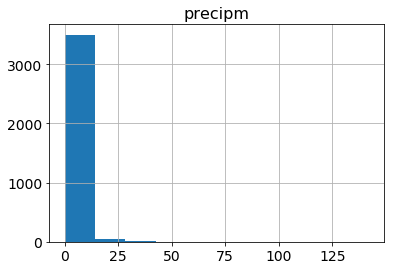

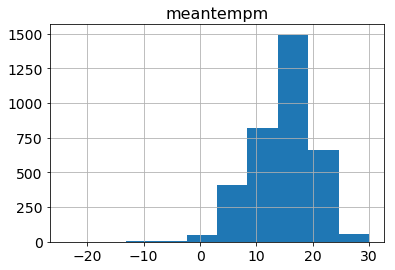

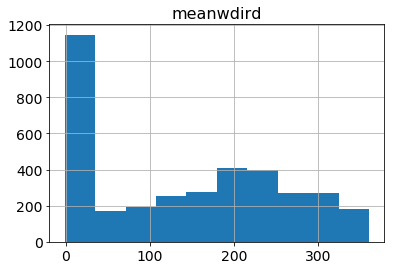

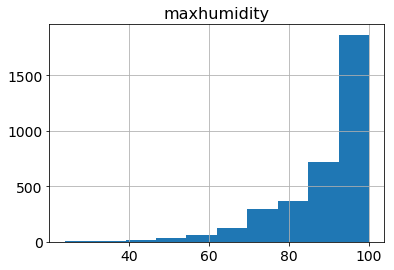

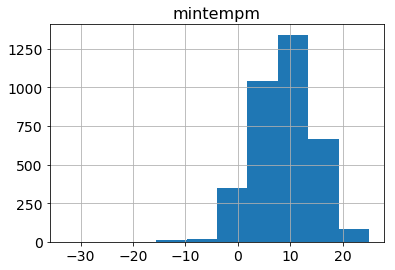

In [31]:
# Plota histogramas de todas as features
for c in base.columns:
    base[c].hist()
    plt.title(c)
    plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


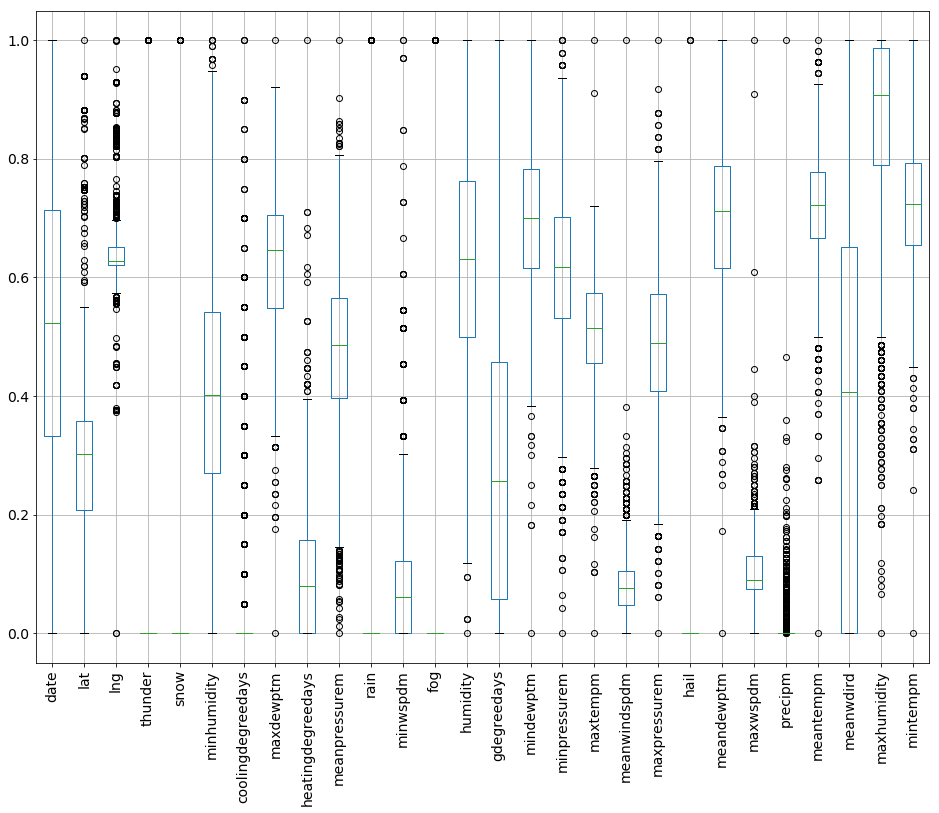

In [32]:
boxes = MinMaxScaler().fit_transform(base)
boxes = pd.DataFrame(boxes, columns=base.columns)
boxes.boxplot(rot=90,figsize=(16,12))

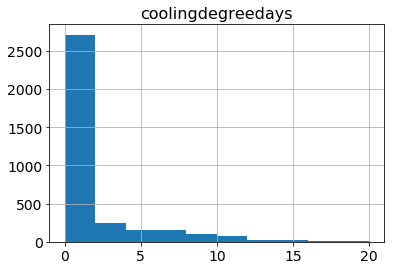

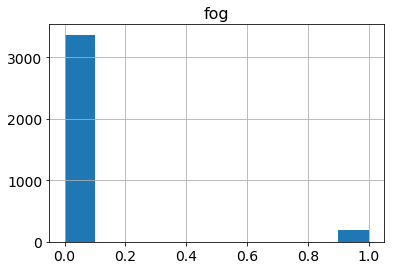

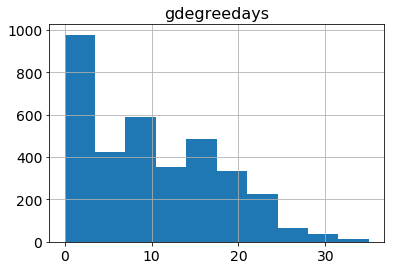

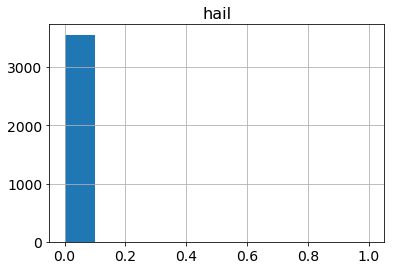

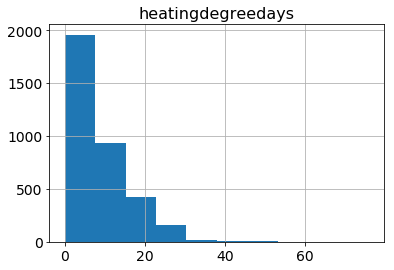

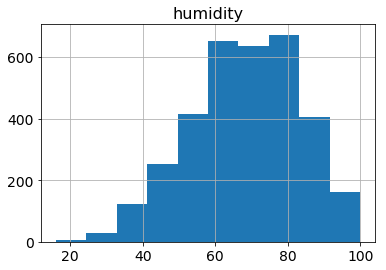

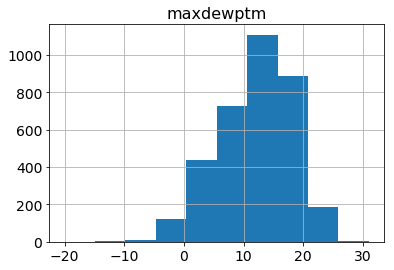

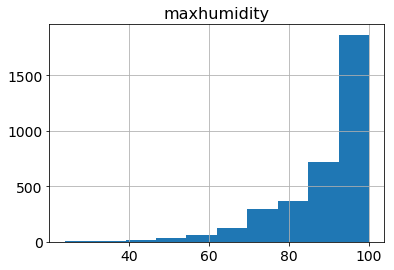

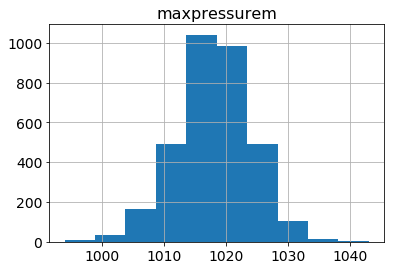

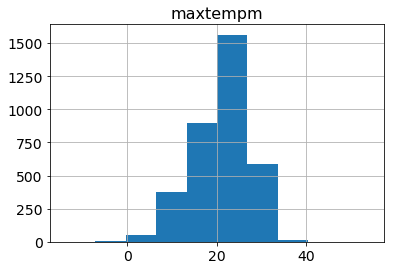

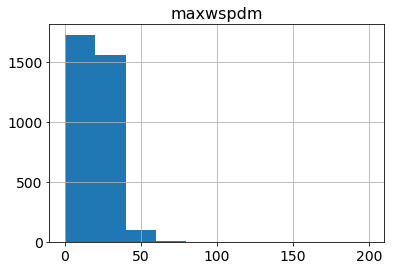

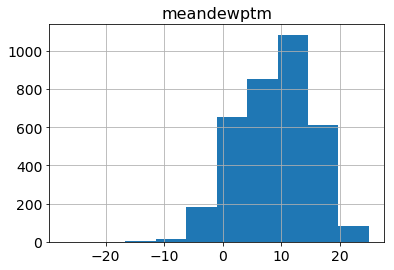

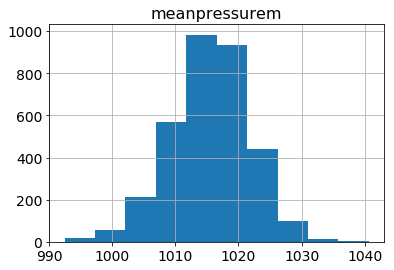

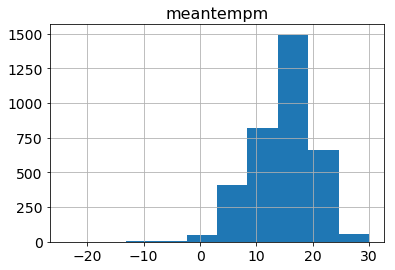

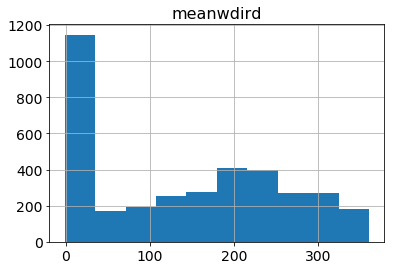

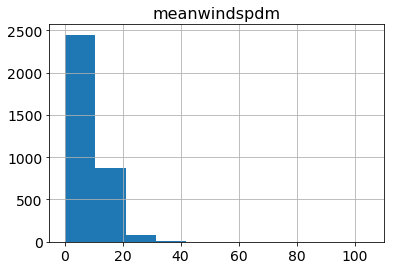

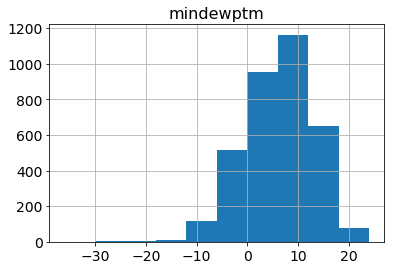

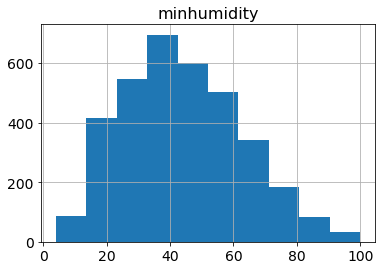

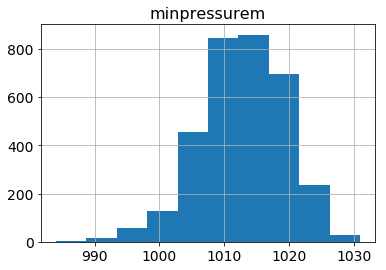

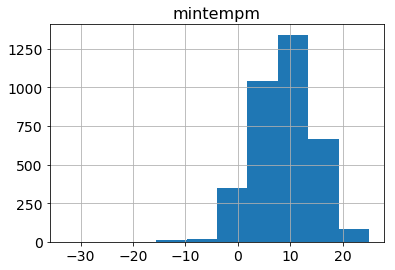

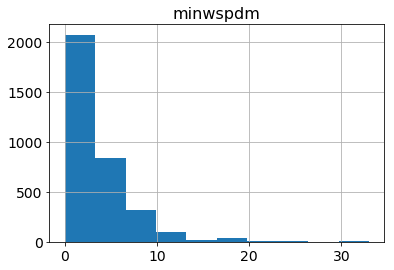

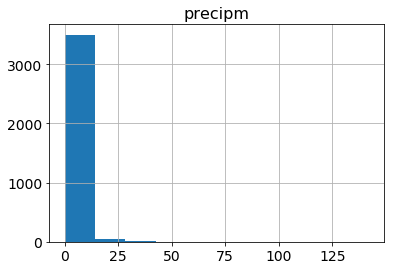

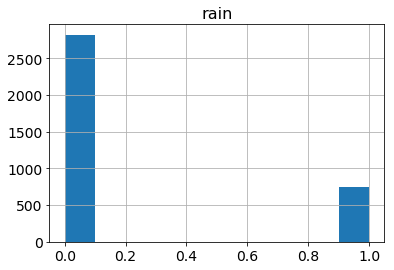

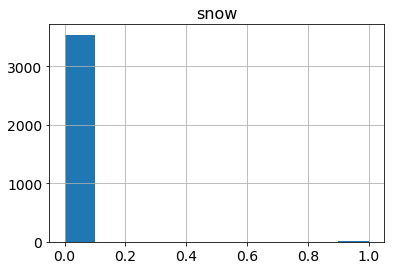

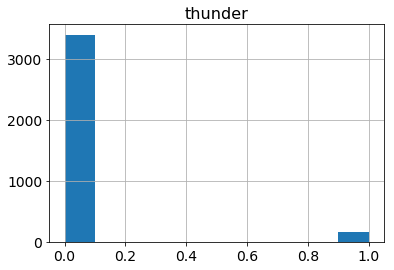

In [33]:
# Plota histogramas das features com mais de 10 empates estatísticos
aux = []
for c in equiv.columns:
    if (equiv[c].count()>10):
        aux.append(c)
for c in aux:
    base[c].hist()
    plt.title(c)
    plt.show()

In [34]:
# Ks escolhidos que minimizam o erro
ks

{'coolingdegreedays': 1,
 'fog': 1,
 'gdegreedays': 1,
 'hail': 29,
 'heatingdegreedays': 1,
 'humidity': 2,
 'maxdewptm': 2,
 'maxhumidity': 4,
 'maxpressurem': 1,
 'maxtempm': 2,
 'maxwspdm': 11,
 'meandewptm': 2,
 'meanpressurem': 1,
 'meantempm': 2,
 'meanwdird': 3,
 'meanwindspdm': 11,
 'mindewptm': 2,
 'minhumidity': 2,
 'minpressurem': 1,
 'mintempm': 2,
 'minwspdm': 3,
 'precipm': 1,
 'rain': 1,
 'snow': 2,
 'thunder': 1}

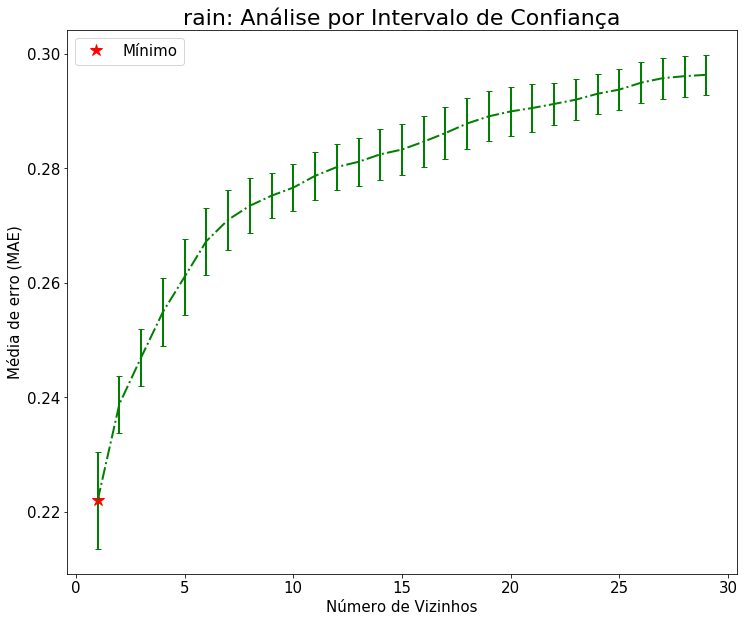

In [35]:
# Plota gráfico mostrando a variação do k para uma feature em função do intervalo de confiança
feature = 'rain'
plt.figure(figsize=(12,10))
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
plt.errorbar(range(1,30), np.abs(scores_mean), yerr=scores_ic, fmt = '-.', capsize=3,linewidth=2, c='g')
plt.plot(ks[feature],np.abs(scores_mean[ks[feature]-1]),'k*', markersize=12,c='r',label=u'Mínimo')
plt.ylabel(u'Média de erro (MAE)') #mean_absolute_error
plt.xlabel(u'Número de Vizinhos')
plt.title(feature+u": Análise por Intervalo de Confiança")
plt.legend()
#plt.savefig('./figures/randomForest_n_estimators_' + str(lag) + '.svg', format="svg", bbox_inches='tight')
plt.savefig('n_vizinhos_'+feature+'.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [36]:
# Erros de cada feature
erros

[-0.0605890603085554,
 -0.006661991584852735,
 -11.54017216642755,
 -1.0539229671897288,
 -2.598134863701578,
 -3.5105563480741795,
 -2.8256516516516514,
 -0.22201963534361852,
 -2.6872058823529414,
 -0.07559607293127629,
 -8.800149031296572,
 -3.5285306704707566,
 -2.8126255380200864,
 -3.118918918918919,
 -2.956490727532097,
 -3.339024064171123,
 -2.612162162162162,
 -0.0019973884025729074,
 -2.477905308464849,
 -6.417326203208555,
 -1.4260603085553996,
 -2.52360912981455,
 -83.14455352968677,
 -7.218938307030129,
 -2.9574893009985734]

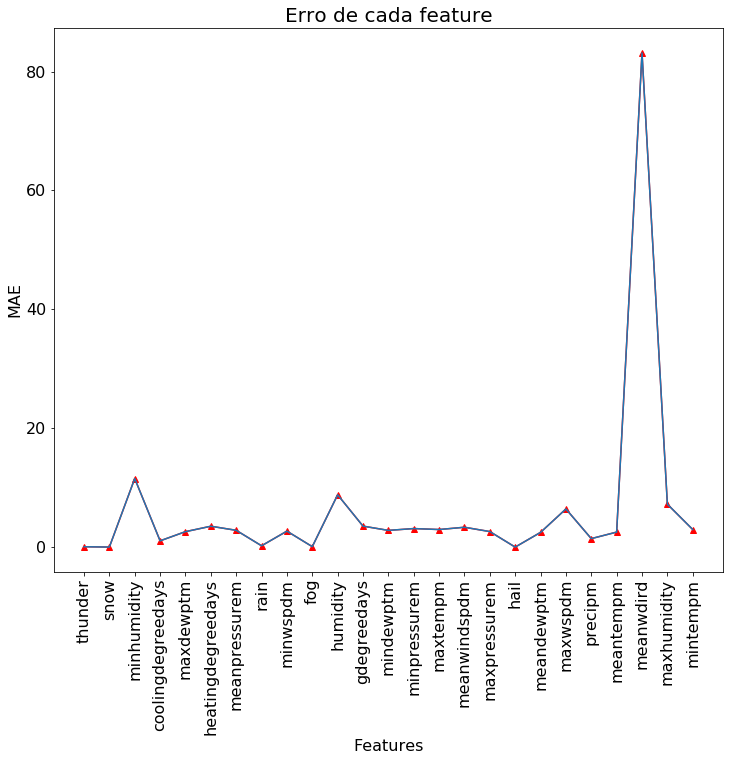

In [37]:
# Gráfico mostrando o erro de cada feature para o k escolhido
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=16)
plt.plot(range(0,25),np.abs(erros),marker='^',color='r')
plt.plot(range(0,25),np.abs(erros))
plt.xlabel('Features')
plt.ylabel('MAE')
plt.title('Erro de cada feature')
plt.xticks(range(0,25),co,rotation='vertical')
plt.show()

In [38]:
# Preenchendo NaN com k-viz usando o número de vizinhos antes escolhido a cada feature
for c in co:
    if (base[c].count() < size):
        kviz = KNeighborsRegressor(n_neighbors=ks[c])
        x = base.dropna(subset=[c])
        kviz.fit(x.loc[:,['date','lat','lng']],x[c])
        teste = base.loc[base[c].isnull()]
        teste[c] = kviz.predict(teste.loc[:,['date','lat','lng']])
        base = pd.concat([x,teste])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
base.describe()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
count,3.675000e+03,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,...,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,2.008286e+07,0.784041,-1.367816,0.045986,0.005306,44.005850,1.371973,11.897279,7.739048,1015.475856,...,8.489994,1017.999456,0.001220,8.933605,20.571874,1.034471,14.736054,137.786122,89.251565,8.828027
std,5.152130e+04,0.027802,0.105574,0.209484,0.072190,18.277395,3.087039,5.996914,8.027693,6.206451,...,4.956126,6.027292,0.033111,6.204898,9.896677,4.430888,5.384924,115.489882,11.240482,5.668182
min,1.997050e+07,0.733476,-2.162174,0.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,992.450000,...,0.000000,994.000000,0.000000,-27.000000,0.000000,0.000000,-24.000000,-1.000000,24.000000,-33.000000
25%,2.004042e+07,0.766937,-1.391900,0.000000,0.000000,30.000000,0.000000,8.000000,0.000000,1011.445000,...,5.000000,1014.000000,0.000000,4.000000,15.000000,0.000000,11.000000,-1.000000,84.000000,5.000000
50%,2.008070e+07,0.782140,-1.382430,0.000000,0.000000,43.000000,0.000000,13.000000,6.000000,1015.810000,...,8.000000,1018.000000,0.000000,10.000000,19.727273,0.000000,15.000000,145.000000,93.000000,9.000000
75%,2.012080e+07,0.791357,-1.352664,0.000000,0.000000,56.000000,0.000000,16.000000,12.000000,1019.675000,...,11.000000,1022.000000,0.000000,14.000000,26.000000,0.000000,18.000000,233.000000,98.000000,13.000000
max,2.018100e+07,0.894822,-0.920427,1.000000,1.000000,100.000000,20.000000,31.000000,76.000000,1040.660000,...,105.000000,1043.000000,1.000000,25.000000,200.000000,141.990000,30.000000,360.000000,100.000000,25.000000


## Criando base usando as estações do ano 

In [40]:
def base_estacao(data):
    primavera = data.loc[(data['date']%1000<=620) & (data['date']%1000>=320)]
    primavera['date'] = "0" #Primavera
    verao = data.loc[(data['date']%1000<=921) & (data['date']%1000>=621)]
    verao['date'] = "1" #Verão
    outono = data.loc[(data['date']%1000<=1220) & (data['date']%1000>=922)]
    outono['date'] = "2" #Outono
    inverno = data.loc[(data['date']%1000<=1221) & (data['date']%1000>=319)]
    inverno['date'] = "3" #Inverno
    frames = [primavera,verao,outono,inverno]
    dadosEstacao = pd.concat(frames)
    return dadosEstacao

In [41]:
dadosEstacao = base_estacao(base)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [42]:
dadosEstacao

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,0,0.855986,-2.162174,0.0,0.0,50.0,0.0,10.0,4.0,1016.50,...,1.000000,1017.0,0.0,9.0,2.000000,0.0,16.0,-1.000000,75.00,12.0
1,0,0.855986,-2.162174,0.0,0.0,46.0,0.0,12.0,12.0,1018.62,...,5.000000,1024.0,0.0,10.0,15.000000,0.0,12.0,38.000000,98.00,6.0
2,0,0.810612,-1.106800,0.0,0.0,36.0,0.0,6.0,21.0,1020.73,...,5.000000,1023.0,0.0,2.0,15.000000,0.2,7.0,59.000000,100.00,-2.0
4,0,0.809122,-1.102953,0.0,0.0,32.0,0.0,4.0,24.0,1022.96,...,10.000000,1025.0,0.0,-1.0,17.000000,4.0,4.0,191.000000,83.00,0.0
6,0,0.808688,-1.111839,0.0,0.0,77.0,0.0,4.0,23.0,1019.33,...,31.000000,1021.0,0.0,3.0,43.000000,0.0,5.0,39.000000,95.00,4.0
35,0,0.875937,-1.695151,0.0,0.0,9.0,0.0,-4.0,22.0,1010.00,...,19.000000,1013.0,0.0,-7.0,48.000000,0.0,6.0,-1.000000,67.00,0.0
36,0,0.875937,-1.695151,0.0,0.0,7.0,0.0,-7.0,18.0,1017.50,...,12.000000,1020.0,0.0,-9.0,28.000000,0.0,8.0,-1.000000,39.00,0.0
37,0,0.875937,-1.695151,0.0,0.0,9.0,0.0,-1.0,3.0,1010.75,...,28.000000,1012.0,0.0,-3.0,56.000000,0.0,16.0,-1.000000,29.00,11.0
38,0,0.875937,-1.695151,0.0,0.0,14.0,0.0,0.0,18.0,1016.75,...,11.000000,1019.0,0.0,-2.0,18.000000,0.0,8.0,-1.000000,53.00,4.0
39,0,0.875937,-1.695151,0.0,0.0,16.0,0.0,1.0,13.0,1018.25,...,18.000000,1021.0,0.0,-2.0,43.000000,0.0,11.0,-1.000000,38.00,4.0


## Atualizando a Data para somente o mês

In [43]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,20150603,0.855986,-2.162174,0.0,0.0,50.0,0.0,10.0,4.0,1016.50,...,1.000000,1017.0,0.0,9.0,2.000000,0.0,16.0,-1.000000,75.00,12.0
1,20150603,0.855986,-2.162174,0.0,0.0,46.0,0.0,12.0,12.0,1018.62,...,5.000000,1024.0,0.0,10.0,15.000000,0.0,12.0,38.000000,98.00,6.0
2,20080504,0.810612,-1.106800,0.0,0.0,36.0,0.0,6.0,21.0,1020.73,...,5.000000,1023.0,0.0,2.0,15.000000,0.2,7.0,59.000000,100.00,-2.0
3,20111026,0.807068,-1.109066,0.0,0.0,51.0,0.0,7.0,20.0,1000.00,...,22.000000,1002.0,0.0,3.0,37.000000,2.0,7.0,320.000000,95.00,5.0
4,20170501,0.809122,-1.102953,0.0,0.0,32.0,0.0,4.0,24.0,1022.96,...,10.000000,1025.0,0.0,-1.0,17.000000,4.0,4.0,191.000000,83.00,0.0
5,20100709,0.810502,-1.119235,0.0,0.0,52.0,8.0,21.0,0.0,1014.27,...,24.000000,1016.0,0.0,19.0,37.000000,0.0,22.0,218.000000,92.00,19.0
6,20110512,0.808688,-1.111839,0.0,0.0,77.0,0.0,4.0,23.0,1019.33,...,31.000000,1021.0,0.0,3.0,43.000000,0.0,5.0,39.000000,95.00,4.0
35,20150413,0.875937,-1.695151,0.0,0.0,9.0,0.0,-4.0,22.0,1010.00,...,19.000000,1013.0,0.0,-7.0,48.000000,0.0,6.0,-1.000000,67.00,0.0
36,20150414,0.875937,-1.695151,0.0,0.0,7.0,0.0,-7.0,18.0,1017.50,...,12.000000,1020.0,0.0,-9.0,28.000000,0.0,8.0,-1.000000,39.00,0.0
37,20150415,0.875937,-1.695151,0.0,0.0,9.0,0.0,-1.0,3.0,1010.75,...,28.000000,1012.0,0.0,-3.0,56.000000,0.0,16.0,-1.000000,29.00,11.0


In [44]:
def atualiza_mes(data):
    data['date'] = (data['date']//100)%100

In [45]:
atualiza_mes(base)

In [46]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,6,0.855986,-2.162174,0.0,0.0,50.0,0.0,10.0,4.0,1016.50,...,1.000000,1017.0,0.0,9.0,2.000000,0.0,16.0,-1.000000,75.00,12.0
1,6,0.855986,-2.162174,0.0,0.0,46.0,0.0,12.0,12.0,1018.62,...,5.000000,1024.0,0.0,10.0,15.000000,0.0,12.0,38.000000,98.00,6.0
2,5,0.810612,-1.106800,0.0,0.0,36.0,0.0,6.0,21.0,1020.73,...,5.000000,1023.0,0.0,2.0,15.000000,0.2,7.0,59.000000,100.00,-2.0
3,10,0.807068,-1.109066,0.0,0.0,51.0,0.0,7.0,20.0,1000.00,...,22.000000,1002.0,0.0,3.0,37.000000,2.0,7.0,320.000000,95.00,5.0
4,5,0.809122,-1.102953,0.0,0.0,32.0,0.0,4.0,24.0,1022.96,...,10.000000,1025.0,0.0,-1.0,17.000000,4.0,4.0,191.000000,83.00,0.0
5,7,0.810502,-1.119235,0.0,0.0,52.0,8.0,21.0,0.0,1014.27,...,24.000000,1016.0,0.0,19.0,37.000000,0.0,22.0,218.000000,92.00,19.0
6,5,0.808688,-1.111839,0.0,0.0,77.0,0.0,4.0,23.0,1019.33,...,31.000000,1021.0,0.0,3.0,43.000000,0.0,5.0,39.000000,95.00,4.0
35,4,0.875937,-1.695151,0.0,0.0,9.0,0.0,-4.0,22.0,1010.00,...,19.000000,1013.0,0.0,-7.0,48.000000,0.0,6.0,-1.000000,67.00,0.0
36,4,0.875937,-1.695151,0.0,0.0,7.0,0.0,-7.0,18.0,1017.50,...,12.000000,1020.0,0.0,-9.0,28.000000,0.0,8.0,-1.000000,39.00,0.0
37,4,0.875937,-1.695151,0.0,0.0,9.0,0.0,-1.0,3.0,1010.75,...,28.000000,1012.0,0.0,-3.0,56.000000,0.0,16.0,-1.000000,29.00,11.0


In [47]:
base.shape

(3675, 28)

## Padronizando com o RobustScaler + MinMaxScaler

In [48]:
# O robust é bom por não ser enganado pelos outliers na média e variância
def padrao_robust_minmax(data):
    padrao = RobustScaler().fit_transform(data)
    padrao = MinMaxScaler().fit_transform(padrao)
    padrao = pd.DataFrame(padrao, columns=data.columns)
    return padrao

In [49]:
padraoMes = padrao_robust_minmax(base)

In [50]:
padraoEstacao = padrao_robust_minmax(dadosEstacao)

In [51]:
padraoMes

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,0.454545,0.759298,0.000000,0.0,0.0,0.479167,0.00,0.588235,0.052632,0.498859,...,0.009524,0.469388,0.0,0.692308,0.010000,0.000000,0.740741,0.000000,0.671053,0.775862
1,0.454545,0.759298,0.000000,0.0,0.0,0.437500,0.00,0.627451,0.157895,0.542833,...,0.047619,0.612245,0.0,0.711538,0.075000,0.000000,0.666667,0.108033,0.973684,0.672414
2,0.363636,0.478079,0.849911,0.0,0.0,0.333333,0.00,0.509804,0.276316,0.586600,...,0.047619,0.591837,0.0,0.557692,0.075000,0.001409,0.574074,0.166205,1.000000,0.534483
3,0.818182,0.456111,0.848086,0.0,0.0,0.489583,0.00,0.529412,0.263158,0.156607,...,0.209524,0.163265,0.0,0.576923,0.185000,0.014085,0.574074,0.889197,0.934211,0.655172
4,0.363636,0.468840,0.853009,0.0,0.0,0.291667,0.00,0.470588,0.315789,0.632856,...,0.095238,0.632653,0.0,0.500000,0.085000,0.028171,0.518519,0.531856,0.776316,0.568966
5,0.545455,0.477393,0.839897,0.0,0.0,0.500000,0.40,0.803922,0.000000,0.452603,...,0.228571,0.448980,0.0,0.884615,0.185000,0.000000,0.851852,0.606648,0.894737,0.896552
6,0.363636,0.466153,0.845852,0.0,0.0,0.760417,0.00,0.470588,0.302632,0.557561,...,0.295238,0.551020,0.0,0.576923,0.215000,0.000000,0.537037,0.110803,0.934211,0.637931
7,0.272727,0.882953,0.376101,0.0,0.0,0.052083,0.00,0.313725,0.289474,0.364032,...,0.180952,0.387755,0.0,0.384615,0.240000,0.000000,0.555556,0.000000,0.565789,0.568966
8,0.272727,0.882953,0.376101,0.0,0.0,0.031250,0.00,0.254902,0.236842,0.519602,...,0.114286,0.530612,0.0,0.346154,0.140000,0.000000,0.592593,0.000000,0.197368,0.568966
9,0.272727,0.882953,0.376101,0.0,0.0,0.052083,0.00,0.372549,0.039474,0.379589,...,0.266667,0.367347,0.0,0.461538,0.280000,0.000000,0.740741,0.000000,0.065789,0.758621


In [52]:
padraoMes.to_csv("americanToadPadraoMes.csv")

In [53]:
padraoEstacao.to_csv("americanToadPadraoEstacao.csv")